## 1

In [4]:
!git clone https://github.com/dml-qom/FarsTail.git

Cloning into 'FarsTail'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 137 (delta 26), reused 18 (delta 18), pack-reused 104
Receiving objects: 100% (137/137), 43.86 MiB | 288.00 KiB/s, done.
Resolving deltas: 100% (40/40), done.


In [5]:
!ls ./FarsTail/data

Indexed-FarsTail.npz  Test-word.csv  Train-word.csv  Val-word.csv


In [11]:
import pandas as pd

data_path = './FarsTail/data/Train-word.csv'
df = pd.read_csv(data_path, sep='\t')
df

,premise,hypothesis,label
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n
3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e
4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c
...,...,...,...
7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e
7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می باشد.,c
7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n
7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c


In [9]:
df['label'].value_counts()

label
n    2448
e    2429
c    2389
Name: count, dtype: int64

In [3]:
from transformers import AutoConfig, AutoTokenizer

config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

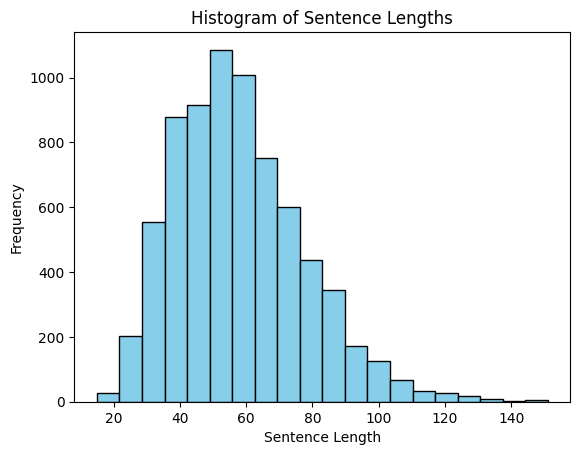

In [41]:
import matplotlib.pyplot as plt

df['premise_length'] = df['premise'].apply(lambda x: len(tokenizer.tokenize(x)))
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(tokenizer.tokenize(x)))

# Plot histogram
plt.hist(df['premise_length'] + df['hypothesis_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.show()


In [42]:
df

,Unnamed: 0,premise,hypothesis,label,premise_length,hypothesis_length,cleaned_premise,cleaned_hypothesis
0,0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e,37,33,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...
1,1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c,37,37,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون‌های جغرافیایی مصر، اندلس و شام، نخستین ر...
2,2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n,37,34,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ‌ترین کانونی بود که ه...
3,3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e,27,17,ویژگی‌های هنر عصر اموی: ۱ - تلفیقی بودن ۲ - با...,نقاشی‌های تزئینی و تندیس‌های بی‌کیفیت، یکی از ...
4,4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c,27,17,ویژگی‌های هنر عصر اموی: ۱ - تلفیقی بودن ۲ - با...,با کیفیت بودن تندیس‌های دوره اموی، یکی از ویژگ...
...,...,...,...,...,...,...,...,...
7261,7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e,37,12,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...
7262,7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می باشد.,c,37,11,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می‌باشد.
7263,7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n,37,12,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...
7264,7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c,33,20,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...


In [17]:
print('data information')
print(df.info(), '\n')

print('missing values stats')
print(df.isnull().sum(), '\n')

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   premise            7266 non-null   object
 1   hypothesis         7266 non-null   object
 2   label              7266 non-null   object
 3   premise_length     7266 non-null   int64 
 4   hypothesis_length  7266 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB
None 

missing values stats
premise              0
hypothesis           0
label                0
premise_length       0
hypothesis_length    0
dtype: int64 



In [20]:
import re
import hazm
from cleantext import clean

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext


def cleaning(text):
    text = text.strip()

    # regular cleaning
    text = clean(text,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol="",
    )

    # cleaning htmls
    text = cleanhtml(text)

    # normalizing
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)

    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text


In [13]:
#df['cleaned_premise'] = df['premise'].apply(cleaning)
#df['cleaned_hypothesis'] = df['hypothesis'].apply(cleaning)

df = pd.read_csv('./cleaned.csv')

In [14]:
df

,Unnamed: 0,premise,hypothesis,label,premise_length,hypothesis_length,cleaned_premise,cleaned_hypothesis
0,0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e,37,33,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...
1,1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c,37,37,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون‌های جغرافیایی مصر، اندلس و شام، نخستین ر...
2,2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n,37,34,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ‌ترین کانونی بود که ه...
3,3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e,27,17,ویژگی‌های هنر عصر اموی: ۱ - تلفیقی بودن ۲ - با...,نقاشی‌های تزئینی و تندیس‌های بی‌کیفیت، یکی از ...
4,4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c,27,17,ویژگی‌های هنر عصر اموی: ۱ - تلفیقی بودن ۲ - با...,با کیفیت بودن تندیس‌های دوره اموی، یکی از ویژگ...
...,...,...,...,...,...,...,...,...
7261,7261,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...,e,37,12,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,تعداد فصول قانون اساسی ۱۴ و تعداد اصول آن ۱۷۷ ...
7262,7262,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می باشد.,c,37,11,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,قانون اساسی دارای ۲۵ فصل و ۱۷۵ اصل می‌باشد.
7263,7263,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...,n,37,12,قانون اساسی جمهوری اسلامی ایران در سال ۱۳۵۸ تو...,در ۲۴ آبان ۵۸ کار تدوین قانون اساسی به پایان ر...
7264,7264,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...,c,33,20,محاصره اقتصادی پیامبر (ص) و یارانش که در سال ه...,حضرت محمد (ص) و یارانش از ششمین سال بعثت تا هش...


In [15]:
# data_path = './FarsTail/data/Val-word.csv'
# val_df = pd.read_csv(data_path, sep='\t')

# val_df['cleaned_premise'] = val_df['premise'].apply(cleaning)
# val_df['cleaned_hypothesis'] = val_df['hypothesis'].apply(cleaning)

val_df = pd.read_csv('./cleaned_val.csv')
val_df

,Unnamed: 0,premise,hypothesis,label,cleaned_premise,cleaned_hypothesis
0,0,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...,e,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...
1,1,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب های هرون از مکتب...,c,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب‌های هرون از مکتب...
2,2,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...,n,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...
3,3,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.,e,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.
4,4,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.,c,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.
...,...,...,...,...,...,...
1532,1532,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","عراق از اعضای تشکیل دهنده ی ""شورای همکاری خلیج...",c,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...",عراق از اعضای تشکیل‌دهنده‌ی «شورای همکاری خلیج...
1533,1533,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...","ایجاد مراکز تحقیقاتی-علمی از اهداف ""شورای همکا...",n,"فقط ۶ کشور قطر, عمان، کویت، امارات، بحرین و عر...",ایجاد مراکز تحقیقاتی-علمی از اهداف «شورای همکا...
1534,1534,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,حضرت امام خمینی (ره) برای اولین بار به ترکیه ت...,e,امام خمینی پنج هجرت مهم داشته‌اند که از قرار ز...,حضرت امام خمینی (ره) برای اولین بار به ترکیه ت...
1535,1535,امام خمینی پنج هجرت مهم داشته اند که از قرار ز...,عراق اولین کشوری بود که امام خمینی به آن تبعید...,c,امام خمینی پنج هجرت مهم داشته‌اند که از قرار ز...,عراق اولین کشوری بود که امام خمینی به آن تبعید...


In [16]:
# data_path = './FarsTail/data/Test-word.csv'
# test_df = pd.read_csv(data_path, sep='\t')

# test_df['cleaned_premise'] = test_df['premise'].apply(cleaning)
# test_df['cleaned_hypothesis'] = test_df['hypothesis'].apply(cleaning)

test_df = pd.read_csv('./cleaned_test.csv')
test_df

,Unnamed: 0,premise,hypothesis,label,hard(hypothesis),hard(overlap),cleaned_premise,cleaned_hypothesis
0,0,دوران امامت امام صادق علیه السلام، مصادف است ب...,امام سجاد (ع) در دورانی امامت کردند که همزمان ...,c,0,1,دوران امامت امام صادق علیه‌السلام، مصادف است ب...,امام سجاد (ع) در دورانی امامت کردند که همزمان ...
1,1,دوران امامت امام صادق علیه السلام، مصادف است ب...,دستگاه فاسد حکومتی با صرف هزینه های هنگفت، سعی...,n,1,0,دوران امامت امام صادق علیه‌السلام، مصادف است ب...,دستگاه فاسد حکومتی با صرف هزینه‌های هنگفت، سعی...
2,2,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,دوران محنت اهل بیت پس از شهادت امام رضا(ع) آغا...,e,0,0,با شهادت امام رضا (ع) مرحله جدیدی از تلاش ائمه...,دوران محنت اهل‌بیت پس از شهادت امام رضا (ع) آغ...
3,3,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,بعد از به شهادت رسیدن امام هادی(ع) دوران محنت ...,c,1,1,با شهادت امام رضا (ع) مرحله جدیدی از تلاش ائمه...,بعد از به شهادت رسیدن امام هادی (ع) دوران محنت...
4,4,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,حضرت جواد(ع) در سال ۱۹۵ هجری در مدینه ولادت یافت.,n,1,0,با شهادت امام رضا (ع) مرحله جدیدی از تلاش ائمه...,حضرت جواد (ع) در سال ۱۹۵ هجری در مدینه ولادت ی...
...,...,...,...,...,...,...,...,...
1559,1559,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,در حاشیه ی دریای خزر کشور آذربایجان وجود ندارد.,c,0,1,دریای خزر یا دریای مازندران یا (با رواج کم) در...,در حاشیه‌ی دریای خزر کشور آذربایجان وجود ندارد.
1560,1560,دریای خَزَر یا دریای مازَندَران یا (با رواج کم...,جمهوری آذربایجان به ترکی آذربایجانی بزرگترین ک...,n,0,1,دریای خزر یا دریای مازندران یا (با رواج کم) در...,جمهوری آذربایجان به ترکی آذربایجانی بزرگترین ک...
1561,1561,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,اولین روزنامه فارسی در هند انتشار یافت.,e,1,0,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,اولین روزنامه فارسی در هند انتشار یافت.
1562,1562,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,ایران نخستین روزنامه فارسی را چاپ کرد.,c,1,0,اولین چاپ مطالب به زبان فارسی در روزنامه‌های ه...,ایران نخستین روزنامه فارسی را چاپ کرد.


In [17]:
import os
import pickle

import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import BertTokenizer


class MNLIDataBert(Dataset):

  def __init__(self, train_df, val_df, test_df):
    self.label_dict = {'e': 0, 'c': 1, 'n': 2}

    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.tokenizer = tokenizer
    self.train_data = None
    self.val_data = None
    self.test_data = None
    self.init_data()

  def init_data(self):
    self.train_data = self.load_data(self.train_df)
    self.val_data = self.load_data(self.val_df)
    self.test_data = self.load_data(self.test_df)

  def load_data(self, df):
    token_ids = []
    mask_ids = []
    seg_ids = []
    y = []

    premise_list = df['cleaned_premise'].to_list()
    hypothesis_list = df['cleaned_hypothesis'].to_list()
    label_list = df['label'].to_list()

    for (premise, hypothesis, label) in zip(premise_list, hypothesis_list, label_list):
      premise_id = self.tokenizer.encode(premise, add_special_tokens = False)
      hypothesis_id = self.tokenizer.encode(hypothesis, add_special_tokens = False)
      pair_token_ids = [self.tokenizer.cls_token_id] + premise_id + [self.tokenizer.sep_token_id] + hypothesis_id + [self.tokenizer.sep_token_id]
      premise_len = len(premise_id)
      hypothesis_len = len(hypothesis_id)

      segment_ids = torch.tensor([0] * (premise_len + 2) + [1] * (hypothesis_len + 1))  # sentence 0 and sentence 1
      attention_mask_ids = torch.tensor([1] * (premise_len + hypothesis_len + 3))  # mask padded values

      token_ids.append(torch.tensor(pair_token_ids))
      seg_ids.append(segment_ids)
      mask_ids.append(attention_mask_ids)
      y.append(self.label_dict[label])

    token_ids = pad_sequence(token_ids, batch_first=True)
    mask_ids = pad_sequence(mask_ids, batch_first=True)
    seg_ids = pad_sequence(seg_ids, batch_first=True)
    y = torch.tensor(y)
    dataset = TensorDataset(token_ids, mask_ids, seg_ids, y)
    print(len(dataset))
    return dataset

  def get_data_loaders(self, batch_size=32, shuffle=True):
    train_loader = DataLoader(
      self.train_data,
      shuffle=shuffle,
      batch_size=batch_size
    )

    val_loader = DataLoader(
      self.val_data,
      shuffle=shuffle,
      batch_size=batch_size
    )

    test_loader = DataLoader(
      self.val_data,
      shuffle=shuffle,
      batch_size=1
    )

    return train_loader, val_loader, test_loader

mnli_dataset = MNLIDataBert(df, val_df, test_df)

7266
1537
1564


In [1]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", num_labels=3)

/media/sgai/M2.21/Bahar/b/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

/media/sgai/M2.21/Bahar/b/.conda/lib/python3.11/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [8]:
def multi_acc(y_pred, y_test):
  acc = (torch.log_softmax(y_pred, dim=1).argmax(dim=1) == y_test).sum().float() / float(y_test.size(0))
  return acc

import time

EPOCHS = 5

def train(model, train_loader, val_loader, optimizer, device='cpu'):
  total_step = len(train_loader)

  for epoch in range(EPOCHS):
    start = time.time()
    model.train()
    total_train_loss = 0
    total_train_acc  = 0
    for batch_idx, (pair_token_ids, mask_ids_, seg_ids_, y) in enumerate(train_loader):
      optimizer.zero_grad()
      pair_token_ids = pair_token_ids.to(device)
      mask_ids = mask_ids_.to(device)
      seg_ids = seg_ids_.to(device)
      labels = y.to(device)

      loss, prediction = model(pair_token_ids,
                             token_type_ids=seg_ids,
                             attention_mask=mask_ids,
                             labels=labels).values()

      acc = multi_acc(prediction, labels)

      loss.backward()
      optimizer.step()

      total_train_loss += loss.item()
      total_train_acc  += acc.item()

    train_acc  = total_train_acc/len(train_loader)
    train_loss = total_train_loss/len(train_loader)
    model.eval()
    total_val_acc  = 0
    total_val_loss = 0
    with torch.no_grad():
      for batch_idx, (pair_token_ids, mask_ids, seg_ids, y) in enumerate(val_loader):
        optimizer.zero_grad()
        pair_token_ids = pair_token_ids.to(device)
        mask_ids = mask_ids.to(device)
        seg_ids = seg_ids.to(device)
        labels = y.to(device)

        loss, prediction = model(pair_token_ids,
                             token_type_ids=seg_ids,
                             attention_mask=mask_ids,
                             labels=labels).values()

        acc = multi_acc(prediction, labels)

        total_val_loss += loss.item()
        total_val_acc  += acc.item()

    val_acc  = total_val_acc/len(val_loader)
    val_loss = total_val_loss/len(val_loader)
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)

    print(f'Epoch {epoch+1}: train_loss: {train_loss:.4f} train_acc: {train_acc:.4f} | val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}')
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [19]:
train_dl, val_dl, test_dl = mnli_dataset.get_data_loaders()

In [23]:
train(model, train_dl, val_dl, optimizer)
torch.save(model.state_dict(), './model-10.pt')

Epoch 1: train_loss: 0.6984 train_acc: 0.6860 | val_loss: 0.5647 val_acc: 0.7755
00:17:22.39
Epoch 2: train_loss: 0.3481 train_acc: 0.8606 | val_loss: 0.5129 val_acc: 0.8182
00:17:22.86
Epoch 3: train_loss: 0.1776 train_acc: 0.9335 | val_loss: 0.8694 val_acc: 0.7647
00:17:22.39
Epoch 4: train_loss: 0.0869 train_acc: 0.9678 | val_loss: 0.7090 val_acc: 0.8112
00:17:23.38
Epoch 5: train_loss: 0.0561 train_acc: 0.9812 | val_loss: 0.9216 val_acc: 0.7966
00:17:23.97
Epoch 6: train_loss: 0.0399 train_acc: 0.9870 | val_loss: 0.9951 val_acc: 0.7889
00:17:22.94
Epoch 7: train_loss: 0.0221 train_acc: 0.9927 | val_loss: 0.9174 val_acc: 0.8112
00:17:23.49
Epoch 8: train_loss: 0.0232 train_acc: 0.9937 | val_loss: 1.1948 val_acc: 0.7876
00:17:23.86
Epoch 9: train_loss: 0.0204 train_acc: 0.9941 | val_loss: 0.9861 val_acc: 0.8061
00:17:22.66
Epoch 10: train_loss: 0.0191 train_acc: 0.9938 | val_loss: 0.9685 val_acc: 0.8125
00:17:22.38


In [2]:
import torch

state_dict = torch.load('./model-10.pt')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [26]:
import numpy as np

model.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dl:
        token_ids, mask_ids, seg_ids, y = batch
        outputs = model(token_ids, token_type_ids=seg_ids, attention_mask=mask_ids)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        
        # Get predicted label (argmax of probabilities)
        predicted_label = torch.log_softmax(probabilities, dim=1).argmax(dim=1)
        predictions.append(predicted_label)
        
        true_labels.append(y.item())

In [42]:
predictions = [pred.tolist()[0] for pred in predictions]

In [45]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

f1_scores = f1_score(true_labels, predictions, labels=[0, 1, 2], average=None)
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8087182823682498
F1 Score for Class 0: 0.817391304347826
F1 Score for Class 1: 0.746383799421408
F1 Score for Class 2: 0.8642714570858282
Confusion Matrix:
[[423  82  10]
 [ 76 387  36]
 [ 21  69 433]]


In [49]:
# Numbers are extracted from training logs

val_acc = [0.7755, 0.8182, 0.7647, 0.8112, 0.7966, 0.7889, 0.8112, 0.7876, 0.8061, 0.8125]
val_loss = [0.5647, 0.5129, 0.8694, 0.7090, 0.9216, 0.9951, 0.9174, 1.1948, 0.9861, 0.9685]

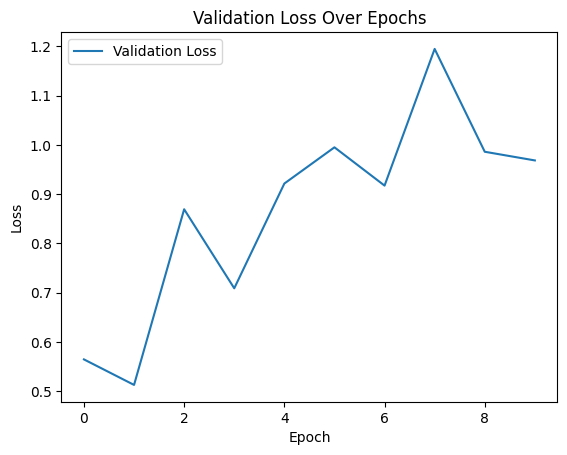

In [50]:
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

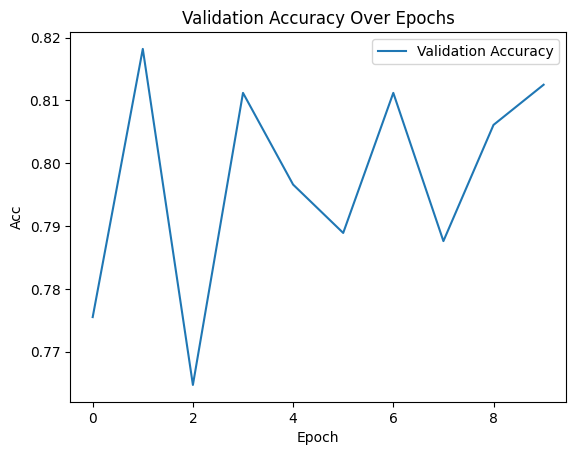

In [51]:
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [37]:
import copy

model_ff9 = copy.deepcopy(model)

for param in model_ff9.bert.encoder.layer[:9].parameters():
    param.requires_grad = False

In [38]:
train(model_ff9, train_dl, val_dl, optimizer)

Epoch 1: train_loss: 0.0102 train_acc: 0.9967 | val_loss: 0.9685 val_acc: 0.8125
00:13:15.21
Epoch 2: train_loss: 0.0096 train_acc: 0.9977 | val_loss: 0.9685 val_acc: 0.8125
00:13:15.04
Epoch 3: train_loss: 0.0098 train_acc: 0.9975 | val_loss: 0.9845 val_acc: 0.8125
00:13:15.05
Epoch 4: train_loss: 0.0131 train_acc: 0.9970 | val_loss: 0.9685 val_acc: 0.8125
00:13:15.00
Epoch 5: train_loss: 0.0103 train_acc: 0.9978 | val_loss: 0.9685 val_acc: 0.8125
00:13:14.92


In [40]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model_ff9.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dl:
        token_ids, mask_ids, seg_ids, y = batch
        outputs = model_ff9(token_ids, token_type_ids=seg_ids, attention_mask=mask_ids)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        
        # Get predicted label (argmax of probabilities)
        predicted_label = torch.log_softmax(probabilities, dim=1).argmax(dim=1)
        predictions.append(predicted_label)
        
        true_labels.append(y.item())

predictions = [pred.tolist()[0] for pred in predictions]

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

f1_scores = f1_score(true_labels, predictions, labels=[0, 1, 2], average=None)
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8087182823682498
F1 Score for Class 0: 0.817391304347826
F1 Score for Class 1: 0.746383799421408
F1 Score for Class 2: 0.8642714570858282
Confusion Matrix:
[[423  82  10]
 [ 76 387  36]
 [ 21  69 433]]


In [51]:
val_acc = [0.8125, 0.8125, 0.8125, 0.8125, 0.8125]
val_loss = [0.9685, 0.9685, 0.9845, 0.9685, 0.9685]

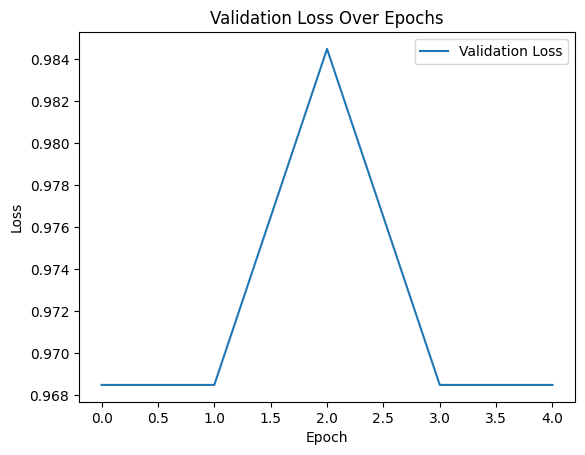

In [52]:
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

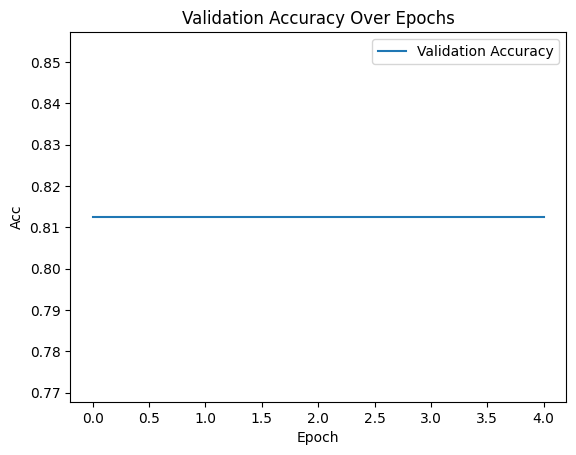

In [53]:
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [48]:
import copy

model_ec = copy.deepcopy(model)

for name, param in model_ec.named_parameters():
    if 'embeddings' not in name and 'classifier' not in name:
        param.requires_grad = False

In [49]:
train(model_ec, train_dl, val_dl, optimizer)

Epoch 1: train_loss: 0.0092 train_acc: 0.9975 | val_loss: 0.9685 val_acc: 0.8125
00:12:09.69
Epoch 2: train_loss: 0.0100 train_acc: 0.9974 | val_loss: 0.9685 val_acc: 0.8125
00:12:09.01
Epoch 3: train_loss: 0.0132 train_acc: 0.9970 | val_loss: 0.9728 val_acc: 0.8125
00:12:07.41
Epoch 4: train_loss: 0.0105 train_acc: 0.9974 | val_loss: 0.9685 val_acc: 0.8125
00:12:07.77
Epoch 5: train_loss: 0.0106 train_acc: 0.9977 | val_loss: 0.9685 val_acc: 0.8125
00:12:07.91


In [50]:
model_ec.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dl:
        token_ids, mask_ids, seg_ids, y = batch
        outputs = model_ec(token_ids, token_type_ids=seg_ids, attention_mask=mask_ids)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        
        # Get predicted label (argmax of probabilities)
        predicted_label = torch.log_softmax(probabilities, dim=1).argmax(dim=1)
        predictions.append(predicted_label)
        
        true_labels.append(y.item())

predictions = [pred.tolist()[0] for pred in predictions]

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

f1_scores = f1_score(true_labels, predictions, labels=[0, 1, 2], average=None)
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8087182823682498
F1 Score for Class 0: 0.817391304347826
F1 Score for Class 1: 0.746383799421408
F1 Score for Class 2: 0.8642714570858282
Confusion Matrix:
[[423  82  10]
 [ 76 387  36]
 [ 21  69 433]]


In [54]:
val_acc = [0.8125, 0.8125, 0.8125, 0.8125, 0.8125]
val_loss = [0.9685, 0.9685, 0.9728, 0.9685, 0.9685]

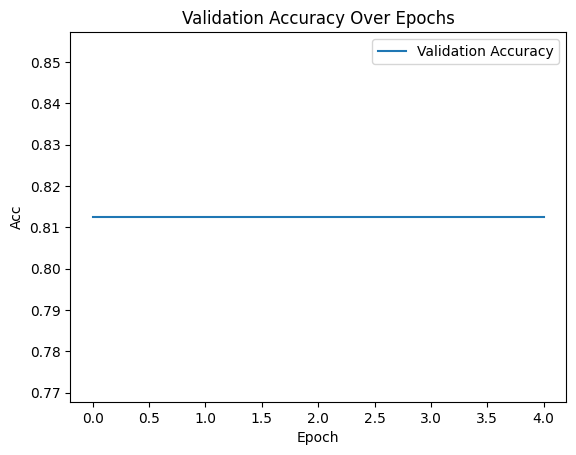

In [55]:
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

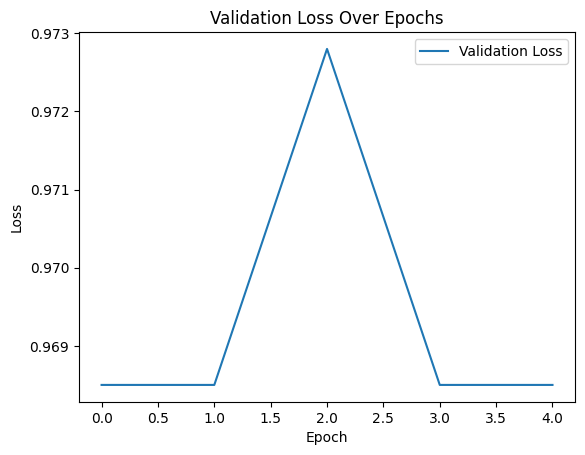

In [56]:
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

In [58]:
from transformers import BertModel
from copy import deepcopy

config_09 = deepcopy(config)
config.num_hidden_layers = 9
config.num_labels = 3

model_09 = BertForSequenceClassification(config)

for i in range(9):
    model_09.bert.encoder.layer[i].load_state_dict(model.bert.encoder.layer[i].state_dict())



In [60]:
optimizer = AdamW(model_09.parameters(), lr=4e-6, correct_bias=True)
train(model_09, train_dl, val_dl, optimizer)

Epoch 1: train_loss: 1.1064 train_acc: 0.3394 | val_loss: 1.0979 val_acc: 0.3482
00:13:19.70
Epoch 2: train_loss: 1.1045 train_acc: 0.3344 | val_loss: 1.0987 val_acc: 0.3335
00:13:19.23
Epoch 3: train_loss: 1.1049 train_acc: 0.3268 | val_loss: 1.0990 val_acc: 0.3335
00:13:18.85
Epoch 4: train_loss: 1.1036 train_acc: 0.3368 | val_loss: 1.0988 val_acc: 0.3284
00:13:16.11
Epoch 5: train_loss: 1.1028 train_acc: 0.3374 | val_loss: 1.0989 val_acc: 0.3182
00:13:21.21


In [61]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model_09.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dl:
        token_ids, mask_ids, seg_ids, y = batch
        outputs = model_09(token_ids, token_type_ids=seg_ids, attention_mask=mask_ids)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        
        # Get predicted label (argmax of probabilities)
        predicted_label = torch.log_softmax(probabilities, dim=1).argmax(dim=1)
        predictions.append(predicted_label)
        
        true_labels.append(y.item())

predictions = [pred.tolist()[0] for pred in predictions]

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

f1_scores = f1_score(true_labels, predictions, labels=[0, 1, 2], average=None)
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.324658425504229
F1 Score for Class 0: 0.0
F1 Score for Class 1: 0.4901768172888016
F1 Score for Class 2: 0.0
Confusion Matrix:
[[  0 515   0]
 [  0 499   0]
 [  0 523   0]]


In [62]:
val_acc = [0.3482, 0.3335, 0.3335, 0.3284, 0.3182]
val_loss = [1.0979, 1.0987, 1.0990, 1.0988, 1.0989]


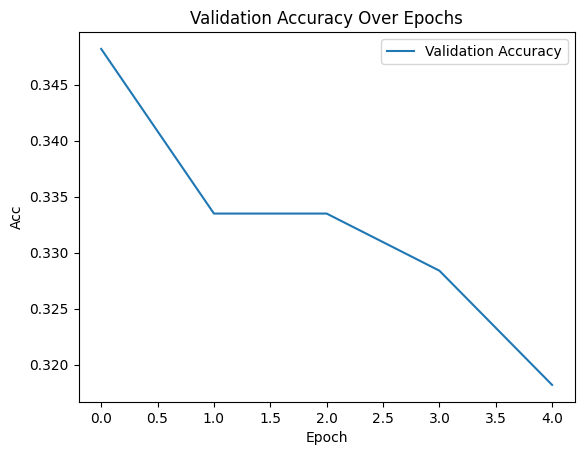

In [63]:
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

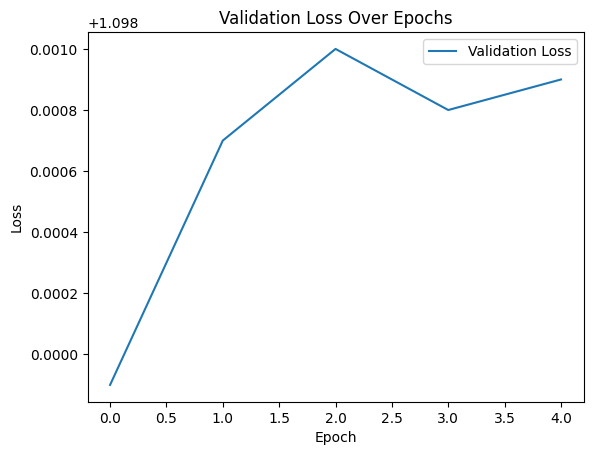

In [64]:
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

In [65]:
import random
import copy

model_hl = copy.deepcopy(model)

model_hl.prune_heads({
    0: random.sample(range(12), 6),
    1: random.sample(range(12), 6),
    2: random.sample(range(12), 6),
    3: random.sample(range(12), 6),
    4: random.sample(range(12), 6),
    5: random.sample(range(12), 6),
    6: random.sample(range(12), 6),
    7: random.sample(range(12), 6),
    8: random.sample(range(12), 6),
    9: random.sample(range(12), 6),
    10: random.sample(range(12), 6),
    11: random.sample(range(12), 6)
})

In [66]:
optimizer = AdamW(model_hl.parameters(), lr=2e-5, correct_bias=False)
train(model_hl, train_dl, val_dl, optimizer)

/media/sgai/M2.21/Bahar/b/.conda/lib/python3.11/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: train_loss: 0.9012 train_acc: 0.6128 | val_loss: 1.2798 val_acc: 0.5223
00:13:41.20
Epoch 2: train_loss: 0.8935 train_acc: 0.6102 | val_loss: 1.2732 val_acc: 0.5223
00:13:42.08
Epoch 3: train_loss: 0.9045 train_acc: 0.6176 | val_loss: 1.2595 val_acc: 0.5421
00:13:41.76
Epoch 4: train_loss: 0.8908 train_acc: 0.6154 | val_loss: 1.2591 val_acc: 0.5421
00:13:40.84
Epoch 5: train_loss: 0.8945 train_acc: 0.6087 | val_loss: 1.2617 val_acc: 0.5421
00:13:42.53


In [67]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model_hl.eval()

predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dl:
        token_ids, mask_ids, seg_ids, y = batch
        outputs = model_hl(token_ids, token_type_ids=seg_ids, attention_mask=mask_ids)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        
        # Get predicted label (argmax of probabilities)
        predicted_label = torch.log_softmax(probabilities, dim=1).argmax(dim=1)
        predictions.append(predicted_label)
        
        true_labels.append(y.item())

predictions = [pred.tolist()[0] for pred in predictions]

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

f1_scores = f1_score(true_labels, predictions, labels=[0, 1, 2], average=None)
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5328562134027326
F1 Score for Class 0: 0.5851318944844125
F1 Score for Class 1: 0.5640378548895899
F1 Score for Class 2: 0.39083969465648855
Confusion Matrix:
[[244 270   1]
 [ 49 447   3]
 [ 26 369 128]]


In [68]:
val_acc = [0.5223, 0.5223, 0.5421, 0.5421, 0.5421]
val_loss = [1.2798, 1.2732, 1.2595, 1.2591, 1.2617]

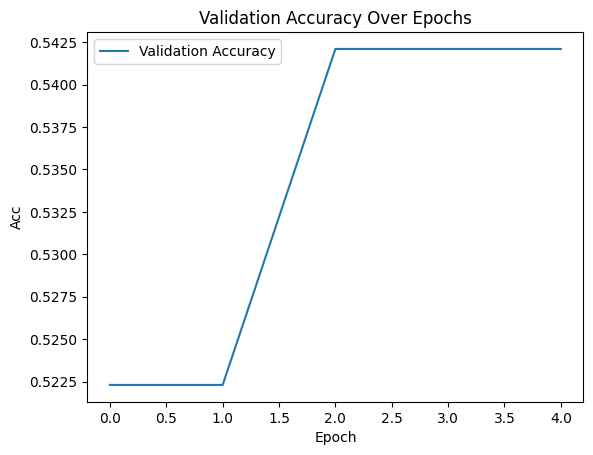

In [69]:
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

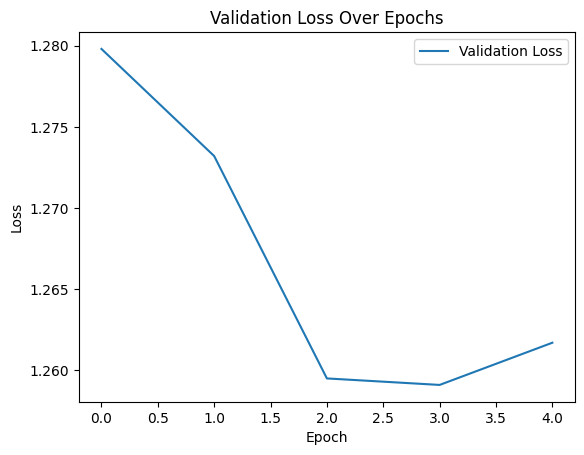

In [70]:
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()